In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
import seaborn as sns

In [2]:
data = pd.read_csv('Data/room_rent.csv')
data

,Area,Square_feet,Monthly_Rent,Furnished_home,type
0,Electronic City,1300,6550,yes,2
1,Electronic City,1300,6450,yes,1
2,Electronic City,1300,7150,yes,2
3,Electronic City,1000,7150,yes,1
4,Electronic City,1500,8050,yes,2
5,Electronic City,1300,7000,yes,1
6,Electronic City,1200,14000,yes,1
7,Electronic City,1300,8700,yes,2
8,Electronic City,1300,6000,yes,2
9,Electronic City,1000,9000,yes,7


In [3]:
data.describe()

,Square_feet,Monthly_Rent,type
count,182.000000,182.000000,182.000000
mean,1251.153846,10894.752747,1.939560
std,342.349759,11374.546247,1.410958
min,300.000000,1105.000000,1.000000
25%,1100.000000,6800.000000,1.000000
50%,1205.000000,8000.000000,2.000000
75%,1300.000000,10000.000000,2.000000
max,3000.000000,100000.000000,7.000000


In [4]:
data.shape

(182, 5)

In [5]:
data = data.dropna()
data

,Area,Square_feet,Monthly_Rent,Furnished_home,type
0,Electronic City,1300,6550,yes,2
1,Electronic City,1300,6450,yes,1
2,Electronic City,1300,7150,yes,2
3,Electronic City,1000,7150,yes,1
4,Electronic City,1500,8050,yes,2
5,Electronic City,1300,7000,yes,1
6,Electronic City,1200,14000,yes,1
7,Electronic City,1300,8700,yes,2
8,Electronic City,1300,6000,yes,2
9,Electronic City,1000,9000,yes,7


In [6]:
data.head(6)

,Area,Square_feet,Monthly_Rent,Furnished_home,type
0,Electronic City,1300,6550,yes,2
1,Electronic City,1300,6450,yes,1
2,Electronic City,1300,7150,yes,2
3,Electronic City,1000,7150,yes,1
4,Electronic City,1500,8050,yes,2
5,Electronic City,1300,7000,yes,1


In [7]:
data.tail(6)

,Area,Square_feet,Monthly_Rent,Furnished_home,type
176,HSR Layout,1000,70000,yes,4
177,HSR Layout,1200,37000,yes,3
178,HSR Layout,1200,14500,yes,1
179,HSR Layout,1600,12600,yes,1
180,HSR Layout,1300,13000,yes,2
181,HSR Layout,1300,13100,yes,1


In [8]:
s = data.columns
s

Index(['Area', 'Square_feet', 'Monthly_Rent', 'Furnished_home', 'type'], dtype='object')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182 entries, 0 to 181
Data columns (total 5 columns):
Area              182 non-null object
Square_feet       182 non-null int64
Monthly_Rent      182 non-null int64
Furnished_home    182 non-null object
type              182 non-null int64
dtypes: int64(3), object(2)
memory usage: 7.1+ KB


In [10]:
data.shape

(182, 5)

In [11]:
data.size

910

In [12]:
data.describe()

,Square_feet,Monthly_Rent,type
count,182.000000,182.000000,182.000000
mean,1251.153846,10894.752747,1.939560
std,342.349759,11374.546247,1.410958
min,300.000000,1105.000000,1.000000
25%,1100.000000,6800.000000,1.000000
50%,1205.000000,8000.000000,2.000000
75%,1300.000000,10000.000000,2.000000
max,3000.000000,100000.000000,7.000000


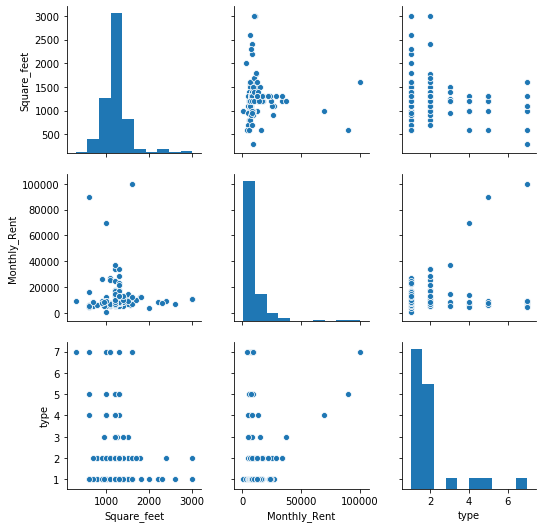

In [13]:
sns.pairplot(data)

In [14]:
s

Index(['Area', 'Square_feet', 'Monthly_Rent', 'Furnished_home', 'type'], dtype='object')

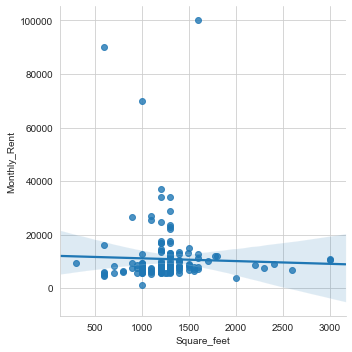

In [15]:
sns.set_style('whitegrid')
sns.lmplot(x = 'Square_feet',y='Monthly_Rent', data = data)

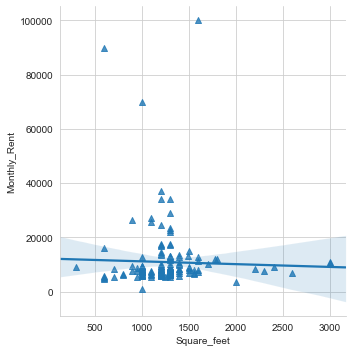

In [16]:
sns.set_style('whitegrid')
sns.lmplot(x = 'Square_feet',y='Monthly_Rent', data = data,markers=['^'])

In [17]:
x_data = data[['Square_feet','type']]
x_data.head()

,Square_feet,type
0,1300,2
1,1300,1
2,1300,2
3,1000,1
4,1500,2


In [18]:
y_data = data[['Monthly_Rent']]
y_data.head()

,Monthly_Rent
0,6550
1,6450
2,7150
3,7150
4,8050


In [19]:
s

Index(['Area', 'Square_feet', 'Monthly_Rent', 'Furnished_home', 'type'], dtype='object')

In [20]:
#plt.scatter(x_data,y_data,marker='+',color='g')

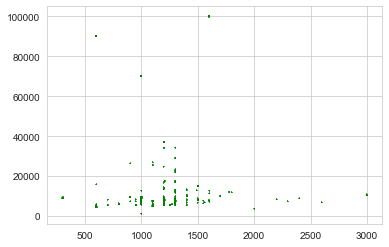

In [21]:
plt.scatter(data.Square_feet,data.Monthly_Rent,data.type,marker='+',color='g')

In [22]:
from sklearn.linear_model import LinearRegression
modle = LinearRegression()
rent_model = modle.fit(x_data,y_data)
rent_model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
rent_model.coef_

array([[6.60678024e-01, 2.02640477e+03]])

In [24]:
rent_model.intercept_

array([6137.80837615])

In [25]:
rent_model.singular_

array([4605.84654972,   18.58999423])

In [26]:
rent_model.rank_

2

In [27]:
rent_model.score(x_data,y_data)

0.06155779675341433

In [28]:
rent_model.predict([[600,2]])

array([[10587.02472433]])

In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_data, y_data, test_size=0.5)

In [30]:
x_train.shape

(91, 2)

In [31]:
x_test.shape

(91, 2)

In [32]:
y_train.shape

(91, 1)

In [33]:
y_test.shape

(91, 1)

In [34]:
y_test.shift

<bound method DataFrame.shift of      Monthly_Rent
137          5550
128          8200
123         10550
154          8200
132          6000
..            ...
28           1105
105          7100
113          9300
69           6450
6           14000

[91 rows x 1 columns]>

In [35]:
sk_model = modle.fit(x_train,y_train)
sk_model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [36]:
sk_model.coef_

array([[   3.62490051, 3392.34317092]])

In [37]:
sk_model.intercept_

array([157.12892301])

In [38]:
sk_model.score(x_train,y_train)

0.12672287582659414

In [39]:
y_prediction = sk_model.predict(x_test)
y_prediction

array([[ 5724.41240121],
       [ 8261.84275969],
       [12016.67598183],
       [11291.6958794 ],
       [ 9841.73567455],
       [11291.6958794 ],
       [21468.72539217],
       [27528.43163159],
       [ 8261.84275969],
       [ 7174.37260606],
       [10566.71577698],
       [17351.40211882],
       [ 7899.35270848],
       [20743.74528975],
       [ 8261.84275969],
       [ 7899.35270848],
       [ 6086.90245242],
       [11654.18593062],
       [11291.6958794 ],
       [12016.67598183],
       [11654.18593062],
       [14424.17363031],
       [10204.22572577],
       [17351.40211882],
       [ 5724.41240121],
       [ 9204.31689285],
       [ 8261.84275969],
       [ 7174.37260606],
       [ 5724.41240121],
       [15641.57649395],
       [ 8261.84275969],
       [28615.90178523],
       [18076.38222125],
       [11654.18593062],
       [ 8261.84275969],
       [ 8261.84275969],
       [ 7174.37260606],
       [ 8261.84275969],
       [12016.67598183],
       [15901.44191397],


In [40]:
Error = y_prediction-y_test
Error

,Monthly_Rent
137,174.412401
128,61.842760
123,1466.675982
154,3091.695879
132,3841.735675
152,4591.695879
61,15268.725392
9,18528.431632
26,2261.842760
3,24.372606


In [41]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score 

In [42]:
mean_absolute_error(y_test,y_prediction)

5616.041666959987

In [43]:
"""fig,ax = plt.subplots(figsize=(10,5))
ax.scatter(x_train,y_train)
ax.plot(x_test,y_prediction)
ax.set_xlabel('sqare_feet')
ax.set_ylabel('Monthly_rent')"""

"fig,ax = plt.subplots(figsize=(10,5))\nax.scatter(x_train,y_train)\nax.plot(x_test,y_prediction)\nax.set_xlabel('sqare_feet')\nax.set_ylabel('Monthly_rent')"

In [44]:
mean_squared_error(y_test,y_prediction)

83573857.44725025

In [47]:
r2_score(y_test,y_prediction)

-0.2614077035922555

In [48]:
x_data

,Square_feet,type
0,1300,2
1,1300,1
2,1300,2
3,1000,1
4,1500,2
5,1300,1
6,1200,1
7,1300,2
8,1300,2
9,1000,7


In [49]:
sk_model.predict([[1300,2]])

array([[11654.18593062]])

In [50]:
sk_model.predict([[1300,3]])

array([[15046.52910154]])

In [51]:
sk_model.predict([[1200,2]])

array([[11291.6958794]])

In [52]:
sk_model.predict([[1000,1]])

array([[7174.37260606]])